In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
N = 51
s = linspace(0,1,N)

In [5]:
X, Y = meshgrid(s,s)

In [6]:
# Creating the lattice of points
X, Y

(array([[0.  , 0.02, 0.04, ..., 0.96, 0.98, 1.  ],
        [0.  , 0.02, 0.04, ..., 0.96, 0.98, 1.  ],
        [0.  , 0.02, 0.04, ..., 0.96, 0.98, 1.  ],
        ...,
        [0.  , 0.02, 0.04, ..., 0.96, 0.98, 1.  ],
        [0.  , 0.02, 0.04, ..., 0.96, 0.98, 1.  ],
        [0.  , 0.02, 0.04, ..., 0.96, 0.98, 1.  ]]),
 array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
        [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04],
        ...,
        [0.96, 0.96, 0.96, ..., 0.96, 0.96, 0.96],
        [0.98, 0.98, 0.98, ..., 0.98, 0.98, 0.98],
        [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ]]))

In [7]:
def myfun(x,y):
    return cos(2*pi*x)*sin(2*pi*y)

In [8]:
# Evaluating the function at each of the finite elements of the space
f = myfun(X,Y)
f.shape

(51, 51)

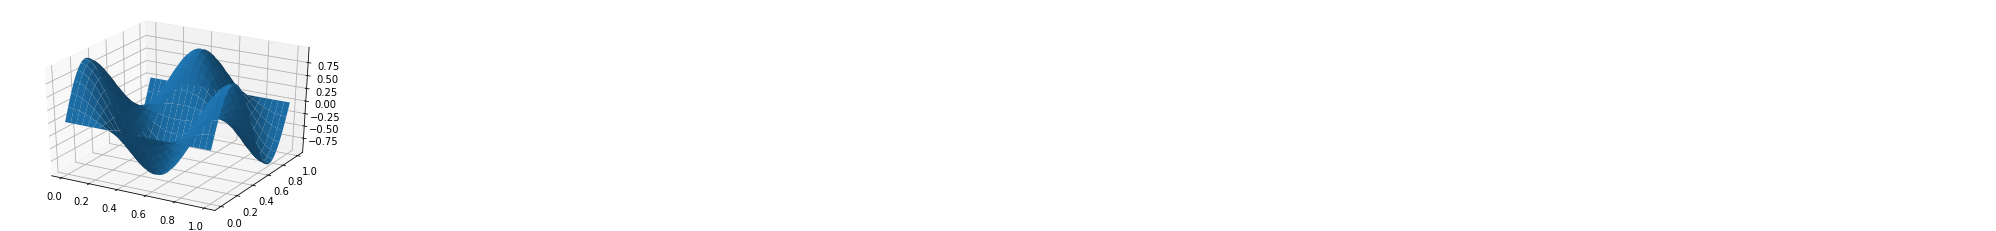

In [9]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, f)

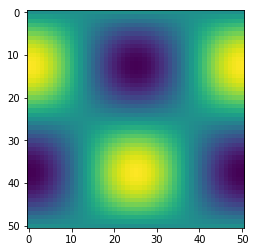

In [10]:
imshow(f)

In [11]:
# Terrible method, since we are scanning through only modifying some values: O(N^4)

B = zeros((N,N,2,N,N))

for i in range(N):
    for j in range (N):
        for l in range(N):
            for m in range(N):
                if l == i+1 and i < N-1 and j == m:
                    B[i, j, 0, l, m] = 1
                if l == i and j == m:
                    B[i, j, 0, l, m] = -1
                if m == j+1 and j < N-1 and l == i:
                    B[i, j, 1, l, m] = 1
                if m == j and l == i:
                    B[i, j, 1, l, m] = -1

In [12]:
# Much better, only loops the necessary: O(N^2)

B = zeros((N,N,2,N,N))
for i in range(N):
    for j in range(N):
        if i < N - 1:
            B[j,i,0,j,i+1] =  1 # x partial derivative using forward euler
            B[j,i,0,j,i  ] = -1
            #
            B[i,j,1,i+1,j] =  1
            B[i,j,1,i  ,j] = -1
        else:
            B[j,i,0,j,i  ] =  1 # y partial derivative using backward euler
            B[j,i,0,j,i-1] = -1
            #
            B[i,j,1,i  ,j] =  1
            B[i,j,1,i-1,j] = -1

B[:,0,1,:,0]

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

In [13]:
grad_f = einsum('ijklm, lm', B, f)

In [14]:
grad_f.shape

(51, 51, 2)

In [15]:
B[0,:,1,:,0]

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

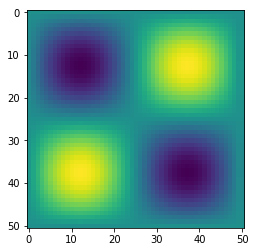

In [16]:
imshow(grad_f[:,:,0])

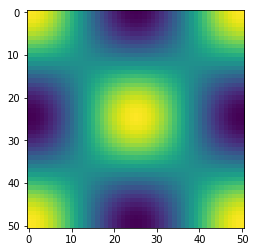

In [17]:
imshow(grad_f[:,:,1])

In [18]:
# Another way to do the partial derivatives
fx = f[:,1:] - f[:,:-1] #equal to numpy.diff(f, axis=1)
fy = f[1:,:] - f[:-1,:] #equal to numpy.diff(f, axis=0)

fx.shape, fy.shape

((51, 50), (50, 51))

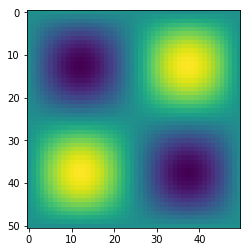

In [19]:
imshow(fx)

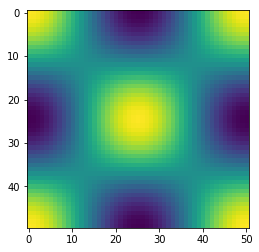

In [20]:
imshow(fy)

In [21]:
# Laplacian matrix
# Corresponds to finite differences along a and b
A = zeros((N,N,N,N))

for i in range(N):
    for j in range(N):
        A[i,j,i,j] = -4
        if i < N-1:
            A[i,j,i+1,j  ] = 1
            A[j,i,j  ,i+1] = 1
        if i > 0:
            A[i,j,i-1,j  ] = 1
            A[j,i,j  ,i-1] = 1
        

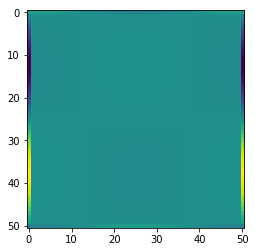

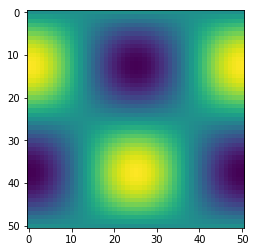

In [22]:
laplacian_f = einsum('ijkl, kl', A, f)

imshow(laplacian_f)
show()
imshow(f)

In [23]:
A[:,0,:,0]

array([[-4.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -4.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -4.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -4.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -4.]])

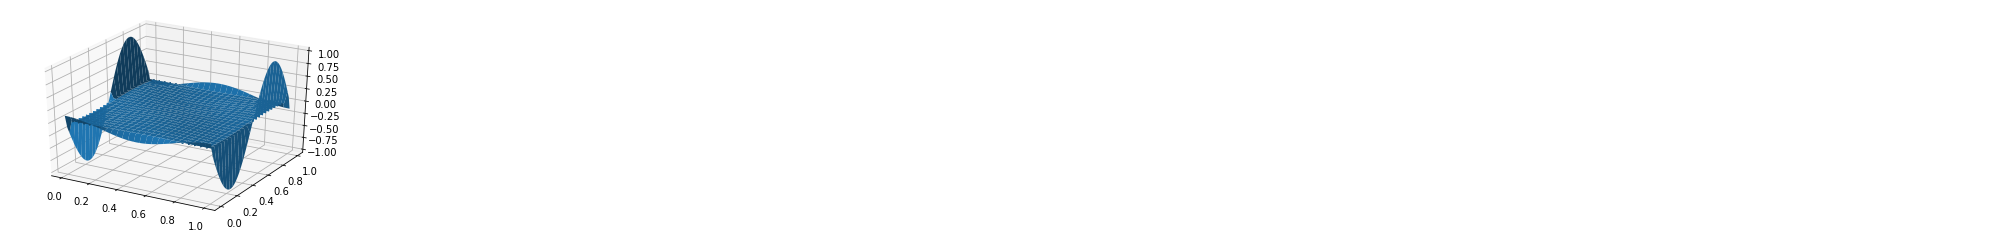

In [24]:
# Irregularities on boundaries are given by the fact that we cannot compute the laplacian on them.
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, laplacian_f)

In [25]:
# How to enforce the condition that u = 0 on the boundaries?
# On the rows corresponding to boundary points we place 1 on the diagonal, 0 everywhere else.

# Setting values at boundaries to zero
A[:,0,:,:] = 0
A[0,:,:,:] = 0
A[:,-1,:,:] = 0
A[-1,:,:,:] = 0

f[:, 0] = 0
f[:, -1] = 0
f[0, :] = 0
f[-1, :] = 0

# Setting the diagonal part to build identity in those sections
for i in range(N):
    A[i, 0, i, 0] = 1
    A[i, -1, i, -1] = 1
    A[0, i, 0, i] = 1
    A[-1, i, -1, i] = 1
    

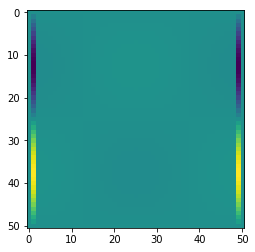

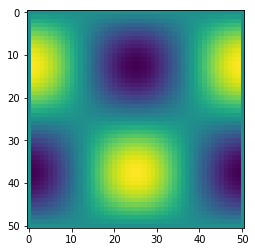

In [26]:
laplacian_f = einsum('ijkl, kl', A, f)

imshow(laplacian_f)
show()
imshow(f)

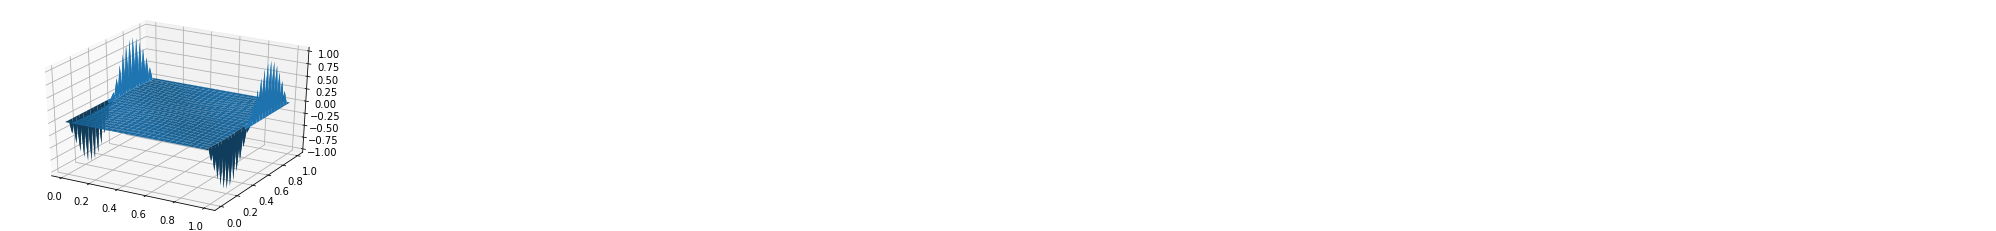

In [27]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, laplacian_f)

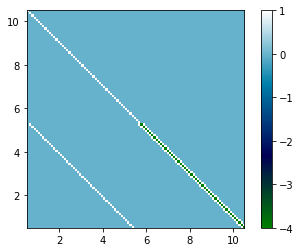

In [45]:
K = A.reshape((N*N, N*N))
F = f.reshape((N*N))

plt.imshow(K[0:100, 0:100], interpolation='nearest', cmap=plt.cm.ocean, extent=(0.5,10.5,0.5,10.5))
plt.colorbar()
plt.show()

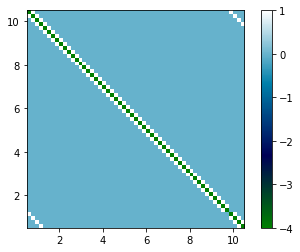

In [47]:
from scipy.sparse import diags
L = diags([1,   1,-4,1,   1], [-N,   -1, 0, 1,    N], shape=(N*N, N*N)).toarray()
for i in range(0,N*N,N):
    L[i,i-1] = 0
    L[i-1,i] = 0
plt.imshow(L[0:55,0:55], interpolation='nearest', cmap=plt.cm.ocean, extent=(0.5,10.5,0.5,10.5))
plt.colorbar()
plt.show()

In [30]:
U = linalg.solve(K,F)

In [31]:
u = U.reshape((N,N))

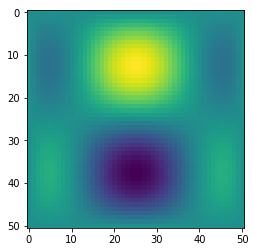

In [32]:
imshow(u)

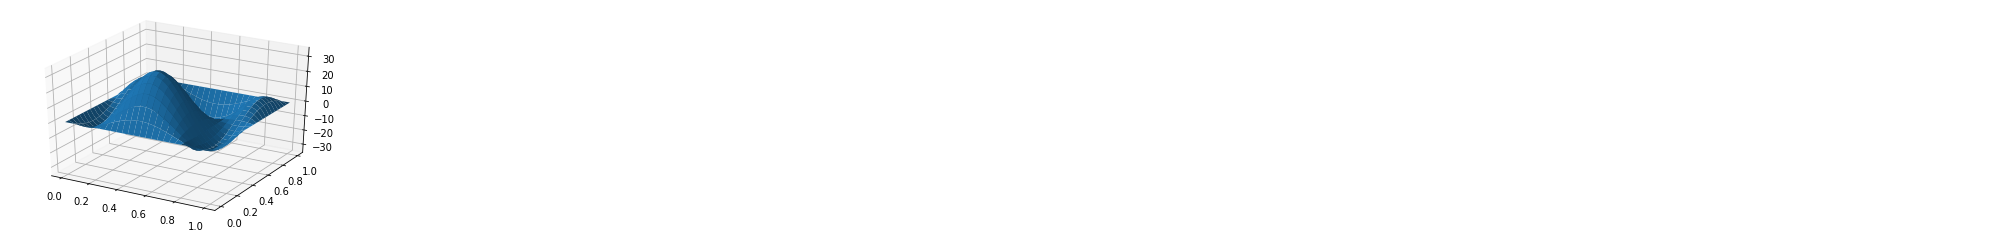

In [33]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, u)

In [34]:
# How to make it faster:
# - Make the problem sparse instead of dense to make computations faster.
# - Compute the LU decomposition of the system once and use it for all the dataset
# - Compute the laplacian of phi on a single function and compute the difference between that and the other functions